In [209]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_df = pd.read_csv(city_data_to_load)
ride_df = pd.read_csv(ride_data_to_load)

In [239]:
city_df.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [253]:
ride_df.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


In [212]:
#Average Fare ($) Per City
city_fare=ride_df[["city","fare"]]
average_fare=city_fare.groupby("city").mean()
average_fare.head()

,fare
city,
Amandaburgh,24.641667
Barajasview,25.332273
Barronchester,36.422500
Bethanyland,32.956111
Bradshawfurt,40.064000


In [213]:
#Total Number of Rides Per City
city_nbrides=ride_df[["city","ride_id"]]
totalrides_percity=city_nbrides.groupby("city").count()
totalrides_percity.head()

,ride_id
city,
Amandaburgh,18
Barajasview,22
Barronchester,16
Bethanyland,18
Bradshawfurt,10


In [262]:
# Combine the data into a single dataset
mergedtotalfare_df =pd.merge(city_df, ride_df, how="left", on=["city"])
mergedtotalfare_df.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [241]:
# Combine the data into a single dataset
merged_df = pd.merge(pd.merge(totalrides_percity,average_fare, how="left", on=["city"]), city_df, how="left", on=["city"])

# Display the data table for preview
merged_df.sum().fare

3346.9645330759035

In [245]:
# Splitting dataframes by cyty type
urban_df=merged_df.loc[merged_df["type"]=="Urban", :]
urban_df.sum().fare

1616.942033307998

In [232]:
# Splitting dataframes by cyty type
suburban_df=merged_df.loc[merged_df["type"]=="Suburban", :]
suburban_df.head()

,city,ride_id,fare,driver_count,type
2,Barronchester,16,36.422500,11,Suburban
3,Bethanyland,18,32.956111,22,Suburban
5,Brandonfort,19,35.437368,10,Suburban
8,Colemanland,22,30.894545,23,Suburban
9,Davidfurt,17,31.995882,23,Suburban


In [234]:
# Splitting dataframes by cyty type
rural_df=merged_df.loc[merged_df["type"]=="Rural", :]
rural_df.head()

,city,ride_id,fare,driver_count,type
4,Bradshawfurt,10,40.064000,7,Rural
17,Garzaport,3,24.123333,7,Rural
20,Harringtonfort,6,33.470000,4,Rural
24,Jessicaport,6,36.013333,1,Rural
33,Lake Jamie,6,34.358333,4,Rural


## Bubble Plot of Ride Sharing Data

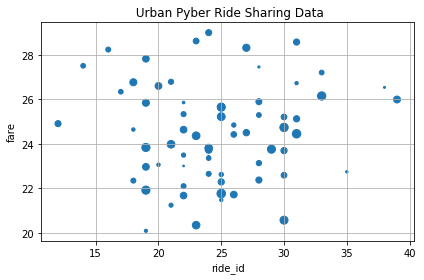

In [220]:
# Obtain the x and y coordinates for each of the three city types

# Build the scatter plots for each city types

# urban_df.plot(kind="scatter", x="ride_id", y="fare", marker="o", figsize="driver_count", grid=True, title="Pyber Ride Sharing Data")
urban_df.plot(kind="scatter", x="ride_id", y="fare", marker="o", s=urban_df["driver_count"], grid=True, title=" Urban Pyber Ride Sharing Data")
plt.tight_layout()
plt.show()



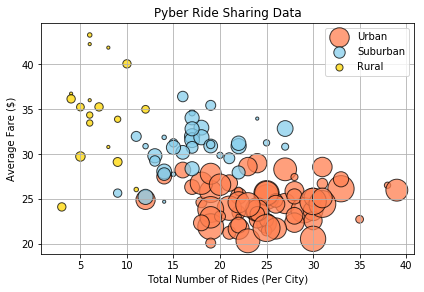

In [278]:
# Incorporate the other graph properties
ax = urban_df.plot.scatter(x="ride_id", y="fare", s=urban_df["driver_count"]*10, color='Coral', alpha=0.75, edgecolors="black", label='Urban');
suburban_df.plot.scatter(x="ride_id", y="fare", s=suburban_df["driver_count"]*10,color='Skyblue', alpha=0.75, edgecolors="black", label='Suburban', ax=ax);
rural_df.plot.scatter(x="ride_id", y="fare", s=rural_df["driver_count"]*10,color='gold', alpha=0.75, label='Rural',
                      edgecolors="black", grid=True, ax=ax)
plt.tight_layout()
# Create a legend
plt.title("Pyber Ride Sharing Data")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
#plt.legend(loc="upper right", sizes=[10])
plt.show()

# Incorporate a text label regarding circle size

# Save Figure

In [240]:
# Show plot
plt.show()

In [266]:
# checking dataframe to get total fares not average fares
cityfare_bytype = mergedtotalfare_df.groupby("type").sum().fare
cityfare_bytype
cityfare_sum = mergedtotalfare_df.sum().fare
cityfare_sum

63538.64000000005

## Total Fares by City Type

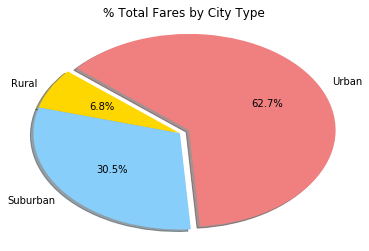

In [267]:
# Calculate Type Percents
#Use the merged dataframe, calculate total, store in variable, get the datafarmes of each city type, 
#store in variable, bring all the variables to the pie chart

cityfare_bytype = mergedtotalfare_df.groupby("type").sum().fare
cityfare_sum = mergedtotalfare_df.sum().fare
total_fare = round((cityfare_bytype/cityfare_sum)*100,1)
# Build Pie Chart
explode = (0, 0, 0.07)
labels=["Rural","Suburban","Urban"]
plt.title("% Total Fares by City Type")
colors=['gold','lightskyblue','lightcoral']

plt.pie(total_fare, explode=explode, labels=labels, autopct='%1.1f%%', colors=colors, shadow=True, startangle=140) 
plt.axis("tight"), 
cell_type: ("markdown")
source: ["Total Rides by City Type"]


# Save Figure


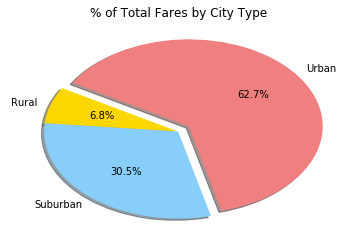

In [4]:
# Show Figure
plt.show()

## Total Rides by City Type

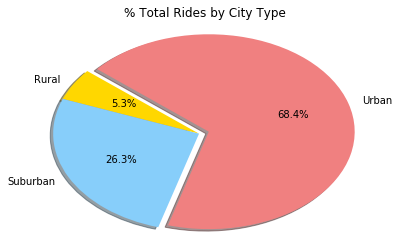

In [236]:
# Calculate Ride Percents
cityride_bytype = merged_df.groupby("type").sum().ride_id
cityride_sum = merged_df.sum().ride_id
total_fare = round((cityride_bytype/cityride_sum)*100,1)
# Build Pie Chart
explode = (0, 0, 0.07)
labels=["Rural","Suburban","Urban"]
plt.title("% Total Rides by City Type")
colors=['gold','lightskyblue','lightcoral']

plt.pie(total_fare, explode=explode, labels=labels, autopct='%1.1f%%', colors=colors, shadow=True, startangle=140) 
plt.axis("tight"), 
cell_type: ("markdown")
source: ["Total Rides by City Type"]

# Save Figure


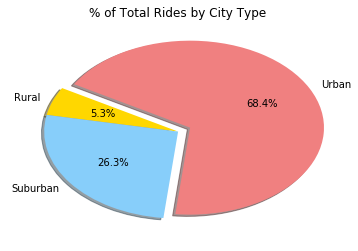

In [5]:
# Show Figure
plt.show()

## Total Drivers by City Type

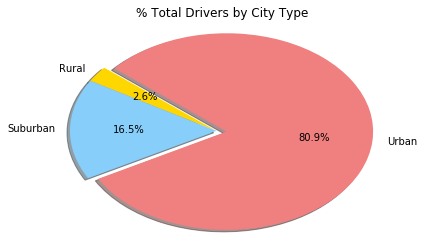

In [237]:
# Calculate Driver Percents
citydrivers_bytype = merged_df.groupby("type").sum().driver_count
citydrivers_sum = merged_df.sum().driver_count
total_fare = round((citydrivers_bytype/citydrivers_sum)*100,1)
# Build Pie Chart
explode = (0, 0, 0.07)
labels=["Rural","Suburban","Urban"]
plt.title("% Total Drivers by City Type")
colors=['gold','lightskyblue','lightcoral']

plt.pie(total_fare, explode=explode, labels=labels, autopct='%1.1f%%', colors=colors, shadow=True, startangle=140) 
plt.axis("tight"), 
cell_type: ("markdown")
source: ["Total Rides by City Type"]

# Save Figure


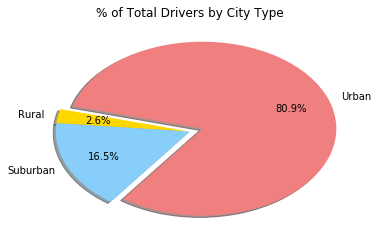

In [6]:
# Show Figure
plt.show()